## 第10章 Pandas基础
Python有了NumPy的Pandas，用Python处理数据就像使用Exel或SQL一样简单方便。
Pandas是基于NumPy的Python 库，它被广泛用于快速分析数据，以及数据清洗和准备等工作。可以把 Pandas 看作是 Python版的Excel或Table。Pandas 有两种数据结构：
Series和DataFrame，Pandas经过几个版本的更新，目前已经成为数据清洗、处理和分析的不二选择。


### 10.2 Pandas数据结构
Pandas中两个最常用的对象是Series和DataFrame。使用pandas前，需导入以下内容：

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

Pandas主要采用Series和DataFrame两种数据结构。Series是一种类似一维数据的数据结构，由数据(values)及索引(indexs)组成，而DataFrame是一个表格型的数据结构，它有一组序列，每列的数据可以为不同类型（NumPy数据组中数据要求为相同类型）,它既有行索引，也有列索引。

In [2]:
a1=np.array([1,2,3,4])
a2=np.array([5,6,7,8])
a3=np.array(['a','b','c','d'])
#为给大家一个直观理解，先生成一个DataFrame
df=pd.DataFrame({'a':a1,'b':a2,'c':a3})
df


,a,b,c
0,1,5,a
1,2,6,b
2,3,7,c
3,4,8,d


上面这个DataFrame的结构及相关概念，请参考下图：
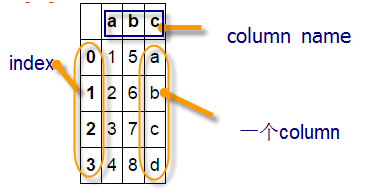

### 10.3 Series
<mark style=background-color:yellow>
Series的标签索引（如a，b，c，它的位置索引（或成为自然索引）仍然保留，
</mark> 
利用标签索引就方便多了，且定位也更精确，不会产生歧义。以下通过实例来说明。

（1）使用Series

In [4]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

s1=Series([1,3,6,-1,2,8])
s1

0    1
1    3
2    6
3   -1
4    2
5    8
dtype: int64

（2）使用Series的索引

In [5]:
s1.values       #显示s1的所有值
s1.index        #显示s1的索引（位置索引或标签索引）
s2=Series([1,3,6,-1,2,8],index=['a','c','d','e','b','g'])  #定义标签索引
s2

a    1
c    3
d    6
e   -1
b    2
g    8
dtype: int64

（3）根据索引找对应值

In [6]:
s2[['a','e']]	###根据标签索引找对应值
#当然，Series除了标签索引外，还有其它很多优点，如运算的简洁：
s2[s2>1]
s2*10

a    10
c    30
d    60
e   -10
b    20
g    80
dtype: int64

### 10.4 DataFrame
DataFrame除了索引有位置索引也有标签索引，而且其数据组织方式与MySQL的表极为相似，除了形式相似，很多操作也类似，这就给操作DataFrame带来极大方便。这些是DataFrame特色的一小部分，它还有比数据库表更强大的功能，如强大统计、可视化等等。
	DataFrame有几个要素：index、columns、values等，columns就像数据库表中的列（每列都是一个series），index是索引，values就是值。


In [7]:
####自动生成一个3行4列的DataFrame，并定义其索引（如果不指定，缺省为整数索引）####及列名
d1=DataFrame(np.arange(12).reshape((3,4)),columns=['a1','a2','a3','a4'], index=['a','b','c'])
d1

,a1,a2,a3,a4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [11]:
print("d1的索引：",d1.index )    #显示索引(有标签索引则显示标签索引，否则显示位置索引)
print("d1的列名",d1.columns)   ##显示列名
print("d1的所有值:\n",d1.values )   ##显示值


d1的索引： Index(['a', 'b', 'c'], dtype='object')
d1的列名 Index(['a1', 'a2', 'a3', 'a4'], dtype='object')
d1的所有值:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### 10.4.1 生成DataFrame
生成DataFrame有很多，比较常用的有导入等长列表、字典、numpy数组、数据文件等。

In [12]:
data={'name':['zhanghua','liuting','gaofei','hedong'],'age':[40,45,50,46],'addr':['jianxi','pudong','beijing','xian']}

d2=DataFrame(data)
#改变列的次序
d3=DataFrame(data,columns=['name','age','addr'],index=['a','b','c','d'])
d3

,name,age,addr
a,zhanghua,40,jianxi
b,liuting,45,pudong
c,gaofei,50,beijing
d,hedong,46,xian


#### 10.4.2 获取数据
获取DataFrame结构中数据可以采用obj[]操作、obj.iloc[]、obj.loc[]等命令。  
（1）使用obj[]来获取列或行

In [16]:
print("d3的name列:\n",d3[['name']])             #选取某一列
print("d3的name,age列:\n",d3[['name','age']])   ##选择多列
print("d3的a至c行:\n",d3['a':'c'])	             ##选择行
print("d3的第2和第3行:\n",d3[1:3] )              ##选择行（利用位置索引）
print("age大于40个数据:\n",d3[d3['age']>40])    ###使用过滤条件

d3的name列:
        name
a  zhanghua
b   liuting
c    gaofei
d    hedong
d3的name,age列:
        name  age
a  zhanghua   40
b   liuting   45
c    gaofei   50
d    hedong   46
d3的a至c行:
        name  age     addr
a  zhanghua   40   jianxi
b   liuting   45   pudong
c    gaofei   50  beijing
d3的第2和第3行:
       name  age     addr
b  liuting   45   pudong
c   gaofei   50  beijing
age大于40个数据:
       name  age     addr
b  liuting   45   pudong
c   gaofei   50  beijing
d   hedong   46     xian


（2）使用obj.loc[] 或obj.iloc[]获取行或列数据。  
- loc通过行标签获取行数据，iloc通过行号获取行数据。  
- loc 在index的标签上进行索引,范围包括start和end.   
- iloc 在index的位置上进行索引,不包括end.   
这两者的主要区别可参考如下示例：

In [17]:
import pandas as pd    
data = [[1,2,3],[4,5,6],[7,8,9]]   
index = ['a','b','c']    
columns=['c1','c2','c3']    
df = pd.DataFrame(data=data, index=index, columns=columns)
###########loc的使用############
df.loc[['a','b']]              #通过行标签获取行数据
df.loc[['a'],['c1','c3']]      #通过行标签、列名称获取行列数据
df.loc[['a','b'],['c1','c3']]  #通过行标签、列名称获取行列数据

#########iloc的使用###############
df.iloc[1]                     #通过行号获取行数据
df.iloc[0:2]                   #通过行号获取行数据，不包括索引2的值
df.iloc[1:,1]                  ##通过行号、列行获取行、列数据
df.iloc[1:,[1,2]]              ##通过行号、列行获取行、列数据
df.iloc[1:,1:3]                ##通过行号、列行获取行、列数据

,c2,c3
b,5,6
c,8,9


#### 10.4.3 修改数据
我们可以像操作数据库表一样操作DataFrame，删除数据、插入数据、修改字段名、索引名、修改数据等，以下通过一些实例来说明。

In [18]:
data={'name':['zhanghua','liuting','gaofei','hedong'],'age':[40,45,50,46],'addr':['jianxi','pudong','beijing','xian']}
d3=DataFrame(data,columns=['name','age','addr'],index=['a','b','c','d'])
d3

,name,age,addr
a,zhanghua,40,jianxi
b,liuting,45,pudong
c,gaofei,50,beijing
d,hedong,46,xian


In [21]:
d3.drop('d',axis=0)	###删除行，如果欲删除列，使axis=1即可
d3  ###从副本中删除，原数据没有被删除
d3.drop('addr',axis=1)   ###删除第addr列

###添加一行，注意需要ignore_index=True，否则会报错
d3.append({'name':'wangkuan','age':38,'addr':'henan'},ignore_index=True)
print("处理后d3的值\n",d3)  ###原数据未变

###添加一行，并创建一个新DataFrame
d4=d3.append({'name':'wangkuan','age':38,'addr':'henan'},ignore_index=True)
d4.index=['a','b','c','d','e']	###修改d4的索引
d4.loc['e','age']=39  ###修改索引为e列名为age的值
print("处理后d4的值\n",d4)


处理后d3的值
        name  age     addr
a  zhanghua   40   jianxi
b   liuting   45   pudong
c    gaofei   50  beijing
d    hedong   46     xian
处理后d4的值
        name  age     addr
a  zhanghua   40   jianxi
b   liuting   45   pudong
c    gaofei   50  beijing
d    hedong   46     xian
e  wangkuan   39    henan


#### 10.4.4 汇总统计

（1）把csv数据导入pandas

In [22]:
from pandas import DataFrame                  
import numpy as np                            
import pandas as pd                           
inputfile = r'.\data\stud_score.csv'
data = pd.read_csv(inputfile,encoding='gbk') 
#其他参数，
###header=None 表示无标题,此时缺省列名为整数；如果设为0，表示第0行为标题
###names，encoding，skiprows等
#读取excel文件，可用 read_excel
df=DataFrame(data)
df.head(3) ###显示前3行


,stud_code,sub_code,sub_name,sub_tech,sub_score,stat_date
0,2015101000,10101,数学分析,NaN,90,NaN
1,2015101000,10102,高等代数,NaN,88,NaN
2,2015101000,10103,大学物理,NaN,67,NaN


（2）查看df的统计信息

In [24]:
print("df各列非NaN的行数:\n",df.count())  #统计非NaN行数
print("df中学生成绩的统计信息:\n",df['sub_score'].describe())	##汇总学生各科成绩
print("df中学生成绩的标准差:\n",df['sub_score'].std())	##求学生成绩的标准差
print("df中学生成绩的方差:\n",df['sub_score'].var())     ##求学生成绩的方差


df中非NaN的行数:
 stud_code    121
sub_code     121
sub_name     121
sub_tech       0
sub_score    121
stat_date      0
dtype: int64
df中学生成绩的统计信息:
 count    121.000000
mean      78.561983
std       12.338215
min       48.000000
25%       69.000000
50%       80.000000
75%       89.000000
max       98.000000
Name: sub_score, dtype: float64
df中学生成绩的标准差:
 12.338214729032906
df中学生成绩的方差:
 152.23154269972454


#### 10.4.5选择部分列

In [26]:
#根据列的索引来选择
df.iloc[:,[0,1,2,4,5]]    
#或根据列名称来选择
df1=df.loc[:,['stud_code','sub_code','sub_name','sub_score','stat_date']]


#### 10.4.6删除重复数据
这里选择学生代码、课程代码、课程名称、程程成绩，注册日期等字段

In [27]:
df1.drop_duplicates(keep='last')

,stud_code,sub_code,sub_name,sub_score,stat_date
0,2015101000,10101,数学分析,90,NaN
1,2015101000,10102,高等代数,88,NaN
2,2015101000,10103,大学物理,67,NaN
3,2015101000,10104,计算机原理,78,NaN
4,2015101000,10105,电磁学,89,NaN
...,...,...,...,...,...
116,2015201010,20102,计算机系统结构,95,NaN
117,2015201010,20103,操作系统,92,NaN
118,2015201010,20104,概率统计,96,NaN
119,2015201010,20105,汇编语言,91,NaN


#### 10.4.7补充缺省值

（1）用指定值补充NaN值

In [28]:
df2=df1.fillna({'stat_date':'2018-11-05'})
df2.head(3)


,stud_code,sub_code,sub_name,sub_score,stat_date
0,2015101000,10101,数学分析,90,2018-11-05
1,2015101000,10102,高等代数,88,2018-11-05
2,2015101000,10103,大学物理,67,2018-11-05


（2）可视化，并在图形上标准数据

In [29]:
df21=df2.loc[:,['sub_name','sub_score']].head(5)
df22=pd.pivot_table(df21, index='sub_name', values='sub_score')
df22


,sub_score
sub_name,
大学物理,67
数学分析,90
电磁学,89
计算机原理,78
高等代数,88


（3）导入一些库及支持中文的库

In [30]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import matplotlib
#以下两句为在坐标轴上正常显示中文
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\simkai.ttf", size=14) 
#这句保证在Jupyter notebook上显示图形
%matplotlib inline

（4）画图

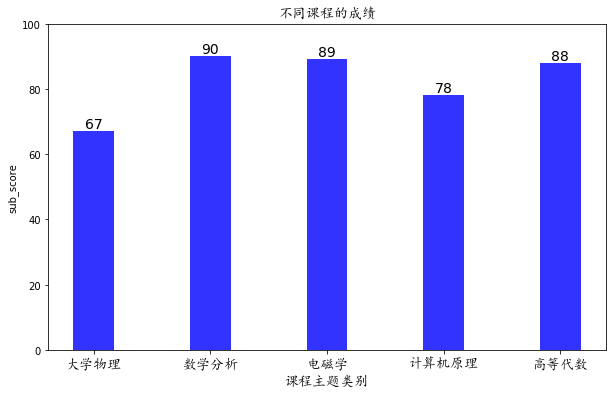

In [31]:
plt.figure(figsize=(10,6))
#设置x轴柱子的个数
x=np.arange(5)+1
#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=np.array(list(df22['sub_score']))
xticks1=list(df22.index) #构造不同课程类目的数列
#画出柱状图
plt.bar(x,y,width = 0.35,align='center',color = 'b',alpha=0.8)
#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
plt.xticks(x,xticks1,size='small',fontproperties=font)
#x、y轴标签与图形标题
plt.xlabel('课程主题类别',fontproperties=font)
plt.ylabel('sub_score')
plt.title('不同课程的成绩',fontproperties=font)
#设置数字标签
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
#设置y轴的范围
plt.ylim(0,100)
plt.show()

#### 10.4.8从MySQL中获取数据
（1）从MySQL数据库中获取学生基本信息表

In [41]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pymysql

conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='mysql2020', db='feigudb', charset='gbk')
#学生代码直接从数据库读取为字符型，而df2中学生代码为整数型，故需要进行类型转换
df_info= pd.read_sql('select cast(stud_code as signed) as stud_code,stud_name,stud_sex, birthday, log_date,orig_addr, lev_date, college_code, college_name, state from stud_info', conn)
#df_info= pd.read_sql('select * from stud_info', conn)


<mark style=background-color:yellow>
【说明】pymysql是第三方模块，需要通过pip install pymysql安装。
    该模块在Python与MySQL之间搭建一个桥梁
</mark>  

（2）查看df_info前3行数据

In [42]:
df_info.head(3)

,stud_code,stud_name,stud_sex,birthday,log_date,orig_addr,lev_date,college_code,college_name,state
0,2015101000,王进,M,1997-08-01,2014-09-01,苏州,None,10,理学院,1
1,2015101001,刘海,M,1997-09-29,2014-09-01,上海,None,10,理学院,1
2,2015101002,张飞,M,1996-10-21,2014-09-02,济南,None,10,理学院,1


（3）选择前两个字段

In [43]:
df_info1=df_info.iloc[:,[0,1]]

（4）df2 与df_info1 根据字段stud_code 进行内关联

In [44]:
df3=pd.merge(df_info1,df2,on='stud_code',how='inner')
df3.head(3)


,stud_code,stud_name,sub_code,sub_name,sub_score,stat_date
0,2015101000,王进,10101,数学分析,90,2018-11-05
1,2015101000,王进,10102,高等代数,88,2018-11-05
2,2015101000,王进,10103,大学物理,67,2018-11-05


（5）对df3 根据字段stud_code,sub_code进行分组，并求平均每个同学各科的平均成绩。

In [45]:
df4=df3.groupby(['stud_name','sub_name'],as_index=False).mean()
df4.head(3)

,stud_name,sub_name,stud_code,sub_code,sub_score
0,刘婷,大学物理,2015101003,10103,65
1,刘婷,数学分析,2015101003,10101,70
2,刘婷,电磁学,2015101003,10105,76


【备注】
如果需要合计各同学的成绩，可用如下语句。

In [46]:
df3.groupby(['stud_name'],as_index=False).sum().head(3)

,stud_name,stud_code,sub_code,sub_score
0,刘婷,10075505015,50515,396
1,刘海,10075505005,50515,430
2,刘芳菲,10075505035,50515,410


（6）选择数学分析课程，并根据成绩进行降序。

In [47]:
df4[df4['sub_code'].isin(['10101'])].sort_values(by='sub_score', ascending=False)

,stud_name,sub_name,stud_code,sub_code,sub_score
49,张飞,数学分析,2015101002,10101,98
82,貂蝉,数学分析,2015101008,10101,96
66,王进,数学分析,2015101000,10101,90
6,刘海,数学分析,2015101001,10101,87
93,韩林,数学分析,2015101005,10101,82
77,西施,数学分析,2015101009,10101,81
11,刘芳菲,数学分析,2015101007,10101,73
1,刘婷,数学分析,2015101003,10101,70
22,卢家,数学分析,2015101004,10101,65
39,吴霞,数学分析,2015101010,10101,61


（7）取前5名

In [50]:
df_top5=df4[df4['sub_code'].isin(['10101'])].sort_values(by='sub_score', ascending=False).head(5)
df_top5

,stud_name,sub_name,stud_code,sub_code,sub_score
49,张飞,数学分析,2015101002,10101,98
82,貂蝉,数学分析,2015101008,10101,96
66,王进,数学分析,2015101000,10101,90
6,刘海,数学分析,2015101001,10101,87
93,韩林,数学分析,2015101005,10101,82


#### 10.4.9把pandas数据写入excel
把pandas数据写入excel中的sheet中

In [52]:
with pd.ExcelWriter(r'.\test1107.xlsx') as writer:
    df2.to_excel(writer,sheet_name='df2',index=False)   #不保存序列号
    df1.to_excel(writer,sheet_name='学生成绩')          #同时保存序列号
    writer.save()
df2.to_csv("test1107.csv",index=False,sep=',')  #把Pandas数据写人csv文件


#### 10.4.10 应用函数及映射
我们知道数据库中有很多函数可用作用于表中元素，DataFrame也可将函数（内置或自定义）应用到各列或行上，而且非常方便和简洁，具体可用通过DataFrame的apply，使或applymap或map，也可以作用到元素级。以下通过实例说明具体使用。

In [53]:
d1=DataFrame(np.arange(12).reshape((3,4)),index=['a','b','c'],columns=['a1','a2','a3','a4'])
d1


,a1,a2,a3,a4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [54]:
d1.apply(lambda x:x.max()-x.min(),axis=0) ###列级处理
d1.applymap(lambda x:x*2)   ###处理每个元素
d1.iloc[1].map(lambda x:x*2)   ###处理每行数据

a1     8
a2    10
a3    12
a4    14
Name: b, dtype: int64

#### 10.4.11 时间序列
pandas最基本的时间序列类型就是以时间戳（时间点）（通常以python字符串或datetime对象表示）为索引的Series：

In [55]:
dates = ['2017-06-20','2017-06-21','2017-06-22','2017-06-23','2017-06-24']
ts = pd.Series(np.random.randn(5),index = pd.to_datetime(dates))
ts

2017-06-20    0.174791
2017-06-21   -0.151387
2017-06-22   -0.745483
2017-06-23   -0.074607
2017-06-24   -0.874642
dtype: float64

索引为日期的DataFrame数据的索引、选取以及子集构造

In [56]:
ts.index
#传入可以被解析成日期的字符串
ts['2017-06-21']
#传入年或年月
ts['2017-06']
#时间范围进行切片
ts['2017-06-20':'2017-06-22']

2017-06-20    0.174791
2017-06-21   -0.151387
2017-06-22   -0.745483
dtype: float64

#### 10.4.12 数据离散化
pandas有现成方法，如cut或qcut等，不需要编写代码，至于如何使用还是通过实例来说明。	

In [57]:
import numpy as np
import pandas as pd
from pandas import DataFrame
df9=DataFrame({'age':[21,25,30,32,36,40,45,50],'type':['1','2','1','2','1','1','2','2']},columns=['age','type'])
df9

,age,type
0,21,1
1,25,2
2,30,1
3,32,2
4,36,1
5,40,1
6,45,2
7,50,2


现在需要对age字段进行离散化, 划分为(20,30],(30,40],(40,50].

In [58]:
level=[20,30,40,50]	##划分为(20,30],(30,40],(40,50]
groups=['A','B','C']	##对应标签为A,B,C
df9['age_t']=pd.cut(df9['age'],level,labels=groups)  ##新增字段为age_t
df10=df9[['age','age_t','type']]
df10

,age,age_t,type
0,21,A,1
1,25,A,2
2,30,A,1
3,32,B,2
4,36,B,1
5,40,B,1
6,45,C,2
7,50,C,2


#### 10.4.13 交叉表
交叉表的说明请参考书中对应章节

In [59]:
import numpy as np
import pandas as pd
from pandas import DataFrame
df=DataFrame({'书代码':['p211','p211','sp2','sp2','hd28','hd28'],'客户类型':['A','B','A','B','A','C'],'购买量':[1,2,3,2,10,1]},columns=['书代码','客户类型','购买量'])
df

,书代码,客户类型,购买量
0,p211,A,1
1,p211,B,2
2,sp2,A,3
3,sp2,B,2
4,hd28,A,10
5,hd28,C,1


实现行列互换，把书代码列转换为行或索引

In [60]:
pd.pivot_table(df,values='购买量',index='客户类型',columns='书代码')

书代码,hd28,p211,sp2
客户类型,,,
A,10.0,1.0,3.0
B,NaN,2.0,2.0
C,1.0,NaN,NaN


In [61]:
####转换后，出现一些NaN值或空值，我们可以把NaN修改为0
pd.pivot_table(df,values='购买量',index='客户类型',columns='书代码',fill_value=0)


书代码,hd28,p211,sp2
客户类型,,,
A,10,1,3
B,0,2,2
C,1,0,0
